<a href="https://colab.research.google.com/github/priyadarsh99/MachineLearning-Projects/blob/main/Titanic_Logistic_Regression_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem: To build a Model which on the basis of the information provided about a passenger classifies whether the passenger survived the shipwreck or not** 

###**Importing Packages**

In [98]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
#importing logisticregression as it is a classification problem

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv')
#loading the data using read_csv

### **Getting some insights about the dataset**

In [100]:
df.shape
#number of rows and columns in the dataset

(891, 12)

In [101]:
df.columns
#various features present in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.info()
#number of entries in each feature and it's data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.head()
#first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###**Visualising the Dataset**

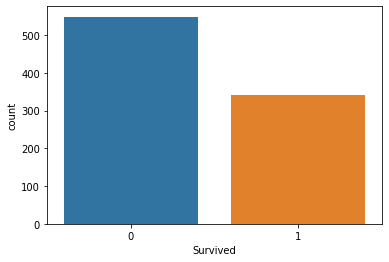

In [104]:
sns.countplot(x='Survived',data = df)
#number of people survived the shipwreck

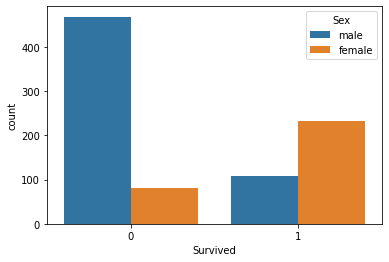

In [105]:
sns.countplot(x='Survived',hue='Sex', data =df)
#number of male and female survived the shipwreck

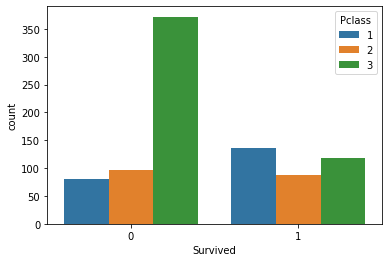

In [106]:
sns.countplot(x='Survived',hue='Pclass',data=df)
#number of people survived from various passenger class

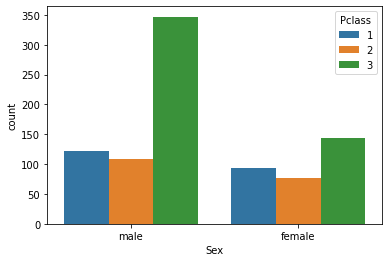

In [107]:
sns.countplot(x='Sex',hue='Pclass',data=df)
#number of males and females survived from various passenger class

####**From the above countplot we can conclude that male passengers prefered the third passenger class and most number of deaths occurred from the third class i.e male fatalities are more as they prefered the third passenger class**

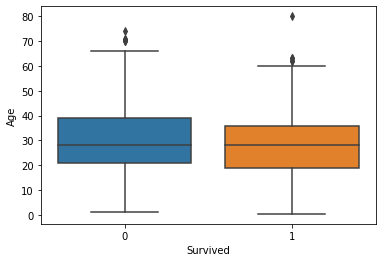

In [108]:
sns.boxplot(x='Survived',y='Age',data=df)

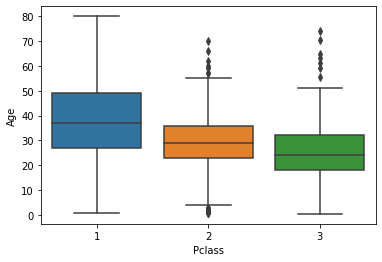

In [109]:
sns.boxplot(x='Pclass',y='Age',data=df)

###**Detecting Missing Values**

In [110]:
df.info()
#non-null count shows that the dataset has many missing values across the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
df.isnull().sum()
#showing the count of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

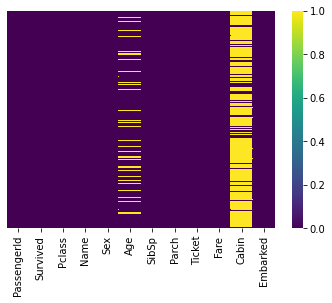

In [112]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
#heatmap confirms the missing values in the dataset

###**One-Hot Encoding**

In [113]:
sex = pd.get_dummies(df['Sex'])
sex.head()
#creating one-hot encoding for gender 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [114]:
sex = sex.drop('female',axis = 1)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [115]:
embark = pd.get_dummies(df['Embarked'],drop_first=True) 
embark.head()
#one-hot encoding for embarked column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [116]:
embark.shape

(891, 2)

In [117]:
pclass = pd.get_dummies(df['Pclass'],drop_first=True) 
pclass.head()
#one-hot encoding for passenger class column

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [118]:
df = pd.concat([df,sex,embark,pclass],axis = 1)
df.head()
#adding the one-hot encoded columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [119]:
df = df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare','Cabin','Embarked'],axis = 1)
#dropping those columns which are not relevant
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


###**Removing Missing Values (One way of dealing with missing values is to remove them)**



In [120]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
male          0
Q             0
S             0
2             0
3             0
dtype: int64

In [121]:
df.sample(10)
#missing values are in the form of NaN

,Survived,Age,SibSp,Parch,male,Q,S,2,3
214,0,NaN,1,0,1,1,0,0,1
261,1,3.0,4,2,1,0,1,0,1
457,1,NaN,1,0,0,0,1,0,0
888,0,NaN,1,2,0,0,1,0,1
681,1,27.0,0,0,1,0,0,0,0
759,1,33.0,0,0,0,0,1,0,0
737,1,35.0,0,0,1,0,0,0,0
811,0,39.0,0,0,1,0,1,0,1
257,1,30.0,0,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [122]:
df = df.dropna()
#dropping all those rows which contain NaN
df.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [123]:
df.info()
#no missing value left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   male      714 non-null    uint8  
 5   Q         714 non-null    uint8  
 6   S         714 non-null    uint8  
 7   2         714 non-null    uint8  
 8   3         714 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 31.4 KB


###**Splitting of the DataSet for training and testing data**

In [124]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [125]:
x.shape,y.shape

((714, 8), (714,))

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 3)
X_train.shape, X_test.shape
#using train_test_split to split the dataset into training and testing data

((499, 8), (215, 8))

###**Applying LogisticRegression Model** 

In [127]:
lg_model = LogisticRegression()

In [128]:
lg_model.fit(X_train,Y_train)
#fitting the model using training data
y_pred_train = lg_model.predict(X_train)
lg_model.score(X_train,Y_train)
#checking the accuracy of the model on training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

0.7935871743486974

In [129]:
y_pred_test = lg_model.predict(X_test)
lg_model.score(X_test,Y_test)
#checking the accuracy of the model on testing data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.813953488372093

###**Visualising the Accuracy of the Model on the test data**

In [130]:
from sklearn import metrics 
print(metrics.classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.80      0.71      0.75        85

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred_test)
#displaying confusion matrix

array([[115,  15],
       [ 25,  60]])

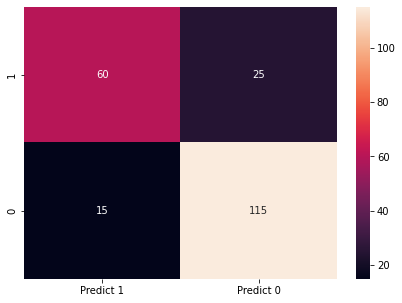

In [132]:
cm = metrics.confusion_matrix(Y_test, y_pred_test, labels = [1,0])
#displaying the confusion matrix via heatmap
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')

#displaying confusion matrix with the help of heatmap

###**Now we'll use SVM Model as it has better fit than Logistic Regression Model**

###**SVM Model**

In [133]:
from sklearn import svm
#importing the svm model

In [134]:
clf = svm.SVC(gamma = 0.0005, C = 12)
#giving the parameters gammma and c value to the model

In [135]:
clf.fit(X_train,Y_train)
#fitting the model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=12, gamma=0.0005)

In [136]:
from sklearn.metrics import accuracy_score
pred_train = clf.predict(X_train)
accuracy_score(Y_train,pred_train)
#checking accuracy of the svm model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7955911823647295

In [137]:
pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [138]:
accuracy_score(Y_test,pred)
#checking accuracy of the svm model on testing data

0.8046511627906977